In [2]:
import pickle
from pathlib import Path

import yaml
import pandas as pd

config_path = Path("./config.yaml")
with config_path.open("r") as f:
    config = yaml.safe_load(f)

base_path = Path(config["base_path"])
stats_path = base_path / config["batches"][0] / config["experiments"][0] / config["trials"][0] / "logs" / "training_stats_checkpoint.pkl"

with stats_path.open("rb") as f:
    training_stats = pickle.load(f)

print(training_stats.keys())
df = pd.DataFrame(training_stats)
df

dict_keys(['total_steps', 'reward', 'episodes', 'training_time', 'collection_time', 'update_time', 'eval_time', 'total_loss', 'policy_loss', 'value_loss', 'entropy_loss'])


,total_steps,reward,episodes,training_time,collection_time,update_time,eval_time,total_loss,policy_loss,value_loss,entropy_loss
0,5124,0.000000,11,8.119645,6.100868,1.283549,0.735207,-0.002377,0.024567,0.010810,-3.234936
1,10248,0.000000,19,15.846051,6.007219,1.054660,0.664501,-0.019803,0.011918,0.001389,-3.241527
2,15372,0.000000,27,23.651816,6.083859,1.157227,0.563059,-0.050395,-0.018682,0.001213,-3.231945
3,20496,0.000000,36,32.527928,6.022373,1.468974,1.384757,-0.028216,0.001746,0.004897,-3.241022
4,25620,0.000000,47,40.319285,6.056874,1.179238,0.552481,-0.023506,0.008524,0.000743,-3.240187
...,...,...,...,...,...,...,...,...,...,...,...
247,1270752,105.231094,9002,1910.553909,6.048570,1.154352,0.544197,0.077429,0.002964,0.215609,-3.333965
248,1275876,105.142879,9017,1918.795485,6.071547,1.586704,0.581672,0.049410,-0.001398,0.168200,-3.329224
249,1281000,95.605461,9032,1927.339667,6.089170,1.160660,1.294346,0.076362,0.011709,0.195887,-3.329032
250,1286124,105.107632,9046,1935.165786,6.075472,1.173977,0.573660,0.049228,-0.004879,0.174308,-3.304769


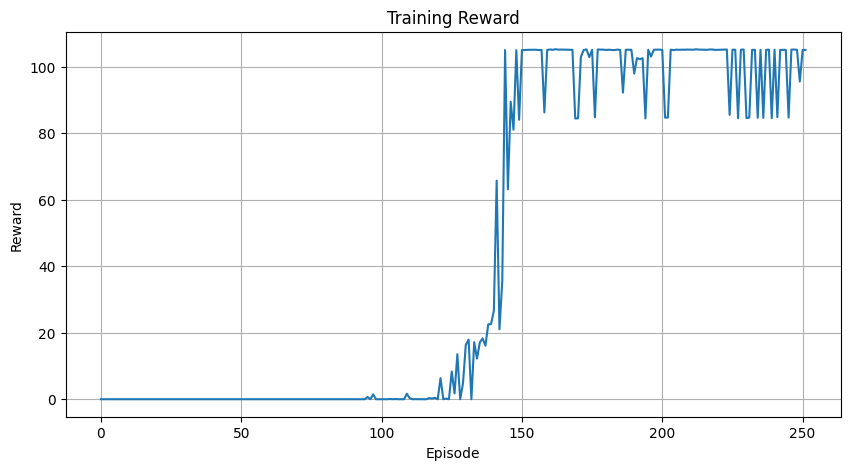

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df["reward"])
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Training Reward")
plt.grid(True)
plt.show()